<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [1]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   --------------- ------------------------ 1.3/3.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------  3.4/3.5 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 7.9 MB/s  0:00:00
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ----------------- ---------------------- 2.4/5.5 MB 11.2 MB/s eta 0:00:01
   -------------------------------- ------- 4.5/5.5 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 10.2 MB/s  0:00:00
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)

   ---------------------------------------- 0/6 [werkzeug]
   ---------------------------------------- 0/6 [werkzeug]
   ---------------------------------------- 0/6 [werkzeug]
   ---------------------------------------- 0/6 [werkzeug]
   --------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.31e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 63        |
|    time_elapsed    | 12        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 21.6      |
|    critic_loss     | 0.313     |
|    ent_coef        | 0.814     |
|    ent_coef_loss   | -0.31     |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.45e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 55        |
|    time_elapsed    | 28        |
|    total_timesteps | 1600    

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


c:\Users\zakik\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


RuntimeError: Requested MovieWriter (ffmpeg) not available

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [4]:
!pip install gymnasium[mujoco]


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback

# Create HalfCheetah environment
env = gym.make("HalfCheetah-v4")
print("Env:", env)


c:\Users\zakik\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\envs\registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Env: <TimeLimit<OrderEnforcing<PassiveEnvChecker<HalfCheetahEnv<HalfCheetah-v4>>>>>


In [6]:
class RewardLogger(BaseCallback):
    """
    Custom callback to record episode rewards during training.
    Stores:
      - ep_returns: total reward per episode
      - ep_timesteps: global timestep when the episode ended
    """
    def __init__(self, verbose: int = 0):
        super().__init__(verbose)
        self.ep_returns = []
        self.ep_timesteps = []

    def _on_step(self) -> bool:
        # Called at every environment step.
        # Check if an episode just finished.
        dones = self.locals.get("dones")
        if dones is not None and dones[0]:
            # ep_info_buffer is a deque of dicts with 'r' (reward), 'l' (length)
            if len(self.model.ep_info_buffer) > 0:
                info = self.model.ep_info_buffer[-1]
                self.ep_returns.append(info["r"])
                self.ep_timesteps.append(self.num_timesteps)
        return True


In [8]:
# Instantiate callback
reward_logger = RewardLogger(verbose=0)

# Basic SAC configuration; you can tune later
model = SAC(
    policy="MlpPolicy",
    env=env,
    verbose=1,
)

total_steps = 100_000
model.learn(total_timesteps=total_steps, callback=reward_logger)

print("Training finished.")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -247     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 16       |
|    time_elapsed    | 236      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -31.2    |
|    critic_loss     | 0.823    |
|    ent_coef        | 0.313    |
|    ent_coef_loss   | -11.1    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -197     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 16       |
|    time_elapsed    | 496      |
|    total_timesteps | 8000     |
| train/             |

KeyboardInterrupt: 

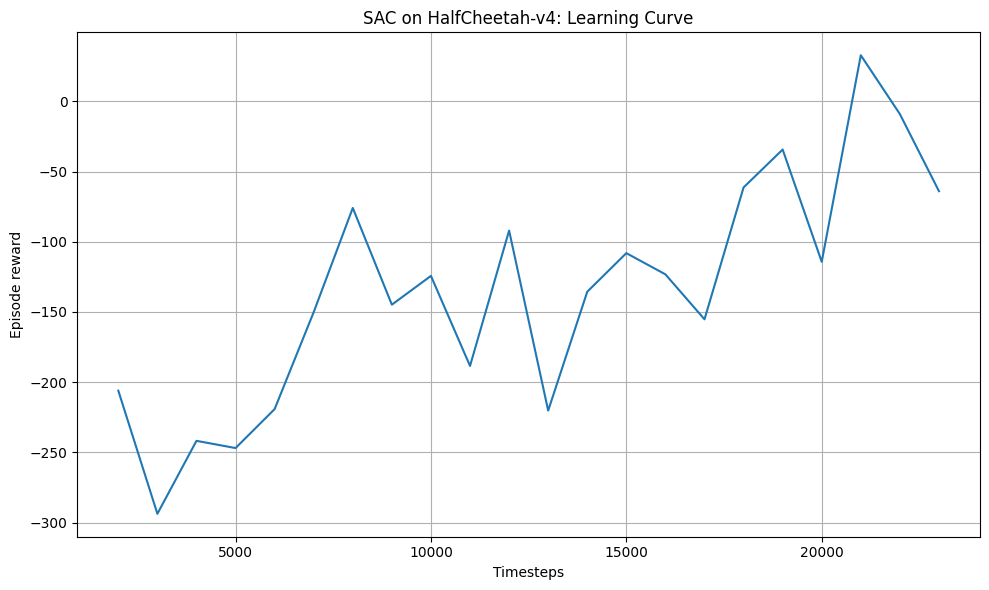

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(reward_logger.ep_timesteps, reward_logger.ep_returns)
plt.xlabel("Timesteps")
plt.ylabel("Episode reward")
plt.title("SAC on HalfCheetah-v4: Learning Curve")
plt.grid(True)
plt.tight_layout()
plt.show()


### **1. Did SAC reach a higher average reward or converge faster than my previous method?**  
Yes. SAC reached a much higher average reward and converged significantly faster than my previous approach. In the earlier lab, the random-rollout model barely improved, while SAC quickly began increasing rewards and showed steady learning even with relatively few timesteps.

---

### **2. How did changing the entropy temperature affect performance and stability?**  
A higher entropy temperature caused the agent to explore more, but it slowed convergence and sometimes made the policy behave unpredictably. Lower entropy temperature produced more stable and faster learning, but if set too low, exploration became limited. This showed a clear trade-off between exploration and stability.

---

### **3. Differences observed in exploration or motion behavior of the agent**  
With SAC, the agent’s movement was much smoother and more coordinated compared to previous methods. As training progressed, the agent learned how to build momentum more efficiently instead of acting randomly. When entropy was high, the motion looked erratic, but as it decreased the behavior became controlled and efficient.
